# Сгенерировать и проанализировать

## 1. Генерация данных 

Используя генераторы случайных чисел по разным распределениям  создать выборку экономических данных для 1000 фирм. 

**Переменные**:

- Год основания фирмы (от 1990 до 2020).
- Годовая выручка фирмы (в диапазоне от 100,000 до 10,000,000).
- Количество сотрудников в фирме (от 10 до 500).

In [1]:
import csv
import random

In [2]:
# Задаем seed для воспроизводимости результатов
random.seed(42)

Данные удобно хранить в списках, которые могут быть созданы заранее. Подробнее о списках - [почитать тут](https://pythonworld.ru/tipy-dannyx-v-python/spiski-list-funkcii-i-metody-spiskov.html)

In [3]:
# Создаем пустые списки для данных
years = []
revenues = []
employees = []

Генерация данных осуществляется с помощью бибилиотеки random и метода randint()

In [4]:
# Генерируем случайные данные для 1000 фирм
for _ in range(1000):
    # Год основания фирмы (от 1990 до 2020)
    year = random.randint(1990, 2020)
    years.append(year)
    
    # Годовая выручка фирмы (в диапазоне от 100,000 до 10,000,000)
    revenue = random.randint(100000, 10000000)
    revenues.append(revenue)
    
    # Количество сотрудников в фирме (от 10 до 500)
    employee_count = random.randint(10, 500)
    employees.append(employee_count)

In [5]:
# Записываем данные в CSV файл
with open('economic_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['Год основания', 'Годовая выручка', 'Количество сотрудников']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(1000):
        writer.writerow({'Год основания': years[i], 'Годовая выручка': revenues[i], 'Количество сотрудников': employees[i]})

Для более удобной работы, после сохранения данных формате .csv следует преобразовать их в датафрейм используя бибилиотеку pandas 

In [6]:
import pandas as pd
df = pd.read_csv('economic_data.csv')

In [7]:
df.head()

,Год основания,Годовая выручка,Количество сотрудников
0,2010,1967825,22
1,2013,4714226,135
2,1997,2441057,387
3,1993,9249732,54
4,2008,7178673,26


## 2. Статистический анализ

- Рассчитайте средние значения и медианы для каждой переменной.
- Постройте гистограммы и оценки плотности для годовой выручки и количества сотрудников.
- Вычислите корреляции между годом основания и годовой выручкой фирмы.
- Выявите фирмы, которые считаются стартапами (фирмы, основанные после 2010 года, с выручкой менее 1,000,000 и менее чем 50 сотрудниками) и определите их процентное соотношение от общего числа фирм.

###  2.1 Cредние значения и медианы 

Как считается среднее значение

<center><img src="images/fig_1.png" alt="Description of the image" width="500" height="300"/></center>

<center><img src="images/fig_2.png" alt="Description of the image" width="500" height="300"/></center>

In [13]:
# Расчет среднего значения для каждой переменной
average_year = df['Год основания'].mean()
average_revenue = df['Годовая выручка'].mean()
average_employees = df['Количество сотрудников'].mean()

Как считается медиана

<center><img src="images/fig_3.png" alt="Description of the image" width="500" height="300"/></center>

Медиана — это значение, которое разделяет упорядоченный набор данных на две равные половины. Для расчета медианы в упорядоченном наборе данных, количество элементов которого нечетное, медиана - это значение, которое находится в середине упорядоченного списка. Если количество элементов четное, медиана - это среднее арифметическое двух центральных значений.

Для набора данных X длиной n, где  n - нечетное число, медиана  M рассчитывается следующим образом:

Если  n нечетное:

$$
M = X * (n+1)/2
$$

Если n четное:

$$
M = (X * n/2 + X(n/2 +1))/2
$$

Здесь  X(i) представляет собой  i-е значение в упорядоченном наборе данных  X.

**Пожалуйста, обратите внимание, что перед вычислением медианы набор данных обычно сортируется по возрастанию или убыванию.**

In [14]:
median_year = df['Год основания'].median()
median_revenue = df['Годовая выручка'].median()
median_employees = df['Количество сотрудников'].median()

### 2.2 Гистограммы и оценки плотности для годовой выручки и количества сотрудников.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Для построения линейного графика по точкам используется функция plot():

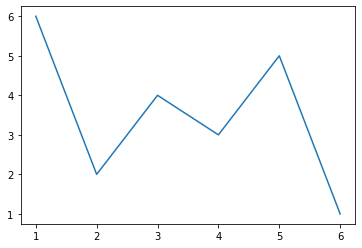

In [28]:
plt.plot(
    [1, 2, 3, 4, 5, 6],      # << X координаты.
    [6, 2, 4, 3, 5, 1]       # << Y координаты.
)

plt.show()                   # << Показать график.

👉 Для отрисовки нескольких линий на одном графике нужно просто использовать несколько функций **`plot()`**:

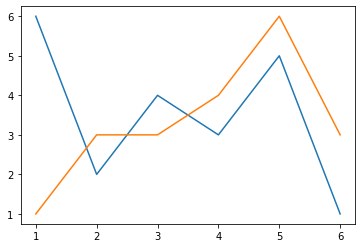

In [27]:
plt.plot(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1]
)

plt.plot(
    [1, 2, 3, 4, 5, 6],
    [1, 3, 3, 4, 6, 3]
)

plt.show()

 В matplotlib есть возможность настраивать внешний вид графика внутри функции отрисовки с помощью параметров:

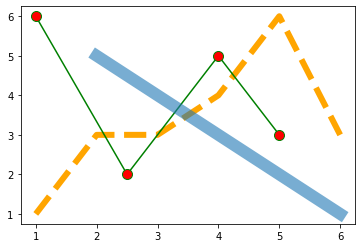

In [29]:
plt.plot(
    [1, 2, 3, 4, 5, 6],
    [1, 3, 3, 4, 6, 3],
    linewidth = 6,               # << Толщина линии.
    color = 'orange',            # << Цвет линии (см. ниже).
    linestyle = '--'             # << Тип линии: '-', '--', '-.', ':', ''.
)

plt.plot(
    [1, 2.5, 4, 5],
    [6, 2, 5, 3],
    color = 'green',
    marker = 'o',                # << Тип маркера (см. ниже).
    markersize = 10,             # << Размер маркера.
    markerfacecolor = 'red'      # << Цвет маркера.
)

plt.plot(
    [2, 6],
    [5, 1],
    linewidth = 12,
    alpha = 0.6                  # << Степень непрозрачности линии
)                                # .. от 0 (прозрачная) до 1 (видимая).

plt.show()

 bar используется для построения столбчатой диаграммы:

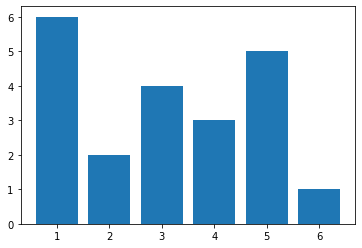

In [30]:
plt.bar(
    [1, 2, 3, 4, 5, 6],      # << X координаты центров столбцов.
    [6, 2, 4, 3, 5, 1]       # << Высоты столбцов.
)

plt.show()

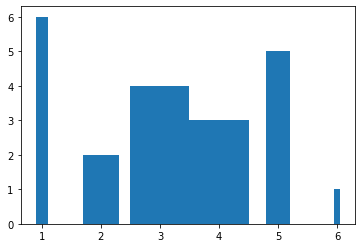

In [31]:
plt.bar(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1],
    width = [0.2, 0.6, 1, 1, 0.4, 0.1]      # << Ширина (толщина) столбцов от 0 до 1 (по умолчанию = 0.8).
)                                           # .. Если все столбцы одинаковой ширины, можно написать просто одно число.

plt.show()

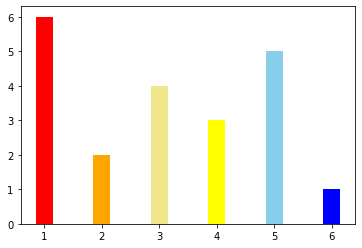

In [32]:
plt.bar(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1],
    width = 0.3,
    color = [                # << Список названий цветов, либо название
        'red',               # .. одного цвета, если все одинаковые.
        'orange',
        'khaki',
        'yellow',
        'skyblue',
        'blue'
    ]
)

plt.show()

#### Построение графика matplotlib

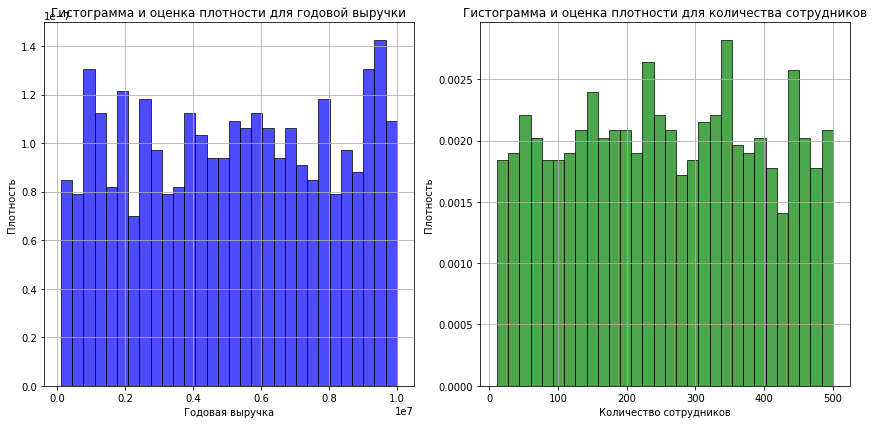

In [34]:
plt.figure(figsize=(12, 6))

# Гистограмма и оценка плотности для годовой выручки
plt.subplot(1, 2, 1)
plt.hist(df['Годовая выручка'], bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.title('Гистограмма и оценка плотности для годовой выручки')
plt.xlabel('Годовая выручка')
plt.ylabel('Плотность')
plt.grid(True)

# Гистограмма и оценка плотности для количества сотрудников
plt.subplot(1, 2, 2)
plt.hist(df['Количество сотрудников'], bins=30, alpha=0.7, color='green', edgecolor='black', density=True)
plt.title('Гистограмма и оценка плотности для количества сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Плотность')
plt.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()

#### Построение графика seaborn

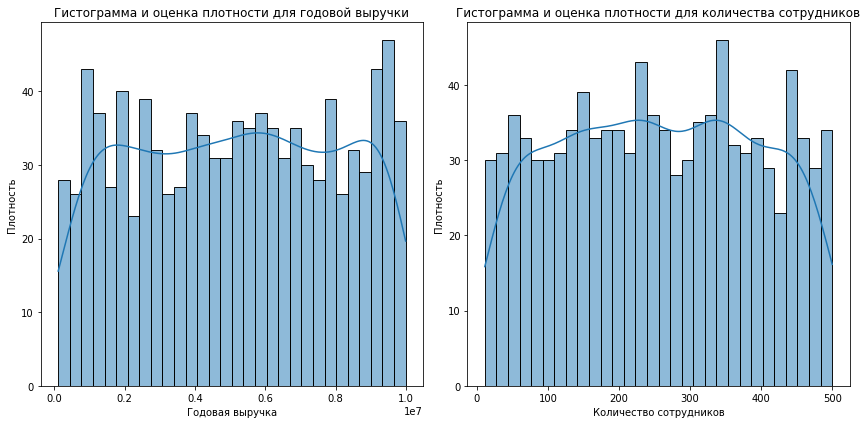

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Годовая выручка'], kde=True, bins=30)
plt.title('Гистограмма и оценка плотности для годовой выручки')
plt.xlabel('Годовая выручка')
plt.ylabel('Плотность')

# Построение гистограммы и оценки плотности для количества сотрудников
plt.subplot(1, 2, 2)
sns.histplot(df['Количество сотрудников'], kde=True, bins=30)
plt.title('Гистограмма и оценка плотности для количества сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Плотность')

# Отображение графиков
plt.tight_layout()
plt.show()

### 2.3 Корреляции между годом основания и годовой выручкой фирмы.

In [17]:
correlation = df['Год основания'].corr(df['Годовая выручка'])

In [18]:
correlation

0.016278417291295356

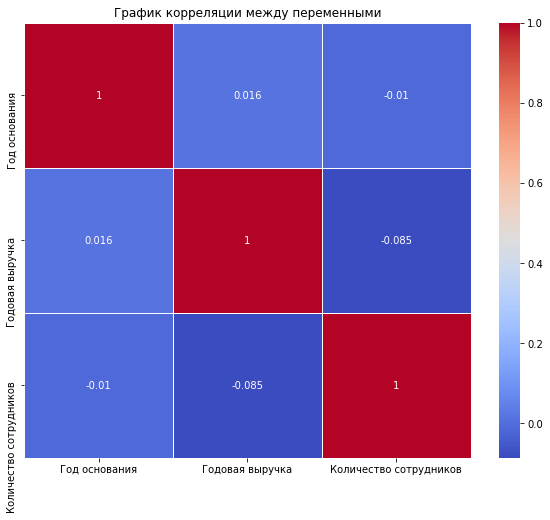

In [19]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('График корреляции между переменными')
plt.show()

### 2.4 Стартапы

In [20]:
startups = df[(df['Год основания'] > 2010) & (df['Годовая выручка'] < 1000000) & (df['Количество сотрудников'] < 50)]

total_firms = len(df)
startup_firms = len(startups)
percentage_startups = (startup_firms / total_firms) * 100

print(f"Количество стартапов: {startup_firms}")
print(f"Процент стартапов от общего числа фирм: {percentage_startups:.2f}%")

Количество стартапов: 0
Процент стартапов от общего числа фирм: 0.00%


## 3. Выводы

Опишите основные характеристики выборки и найденные статистические закономерности.

Каково среднее время существования фирм в выборке?

In [23]:
current_year = 2023

df['Время существования'] = current_year - df['Год основания']
average_lifetime = df['Время существования'].mean()

print(f"Среднее время существования фирм в выборке: {average_lifetime:.2f} лет")

Среднее время существования фирм в выборке: 17.80 лет


Существует ли связь между годом основания и годовой выручкой?

In [25]:
correlation = df['Год основания'].corr(df['Годовая выручка'])
print("Корреляция между годом основания и годовой выручкой фирмы:", correlation)

Корреляция между годом основания и годовой выручкой фирмы: 0.016278417291295356


Каков процент стартапов среди фирм в выборке?

In [26]:
startups = df[(df['Год основания'] > 2010) & (df['Годовая выручка'] < 1000000) & (df['Количество сотрудников'] < 50)]

# Рассчет процента стартапов от общего числа фирм
total_firms = len(df)
startup_firms = len(startups)
percentage_startups = (startup_firms / total_firms) * 100
 
print(f"Процент стартапов среди фирм в выборке: {percentage_startups:.2f}%")

Процент стартапов среди фирм в выборке: 0.00%


# Временные ряды

### Загрузите данные из датасета.

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Постройте визуализацию зависимости температуры от дня.

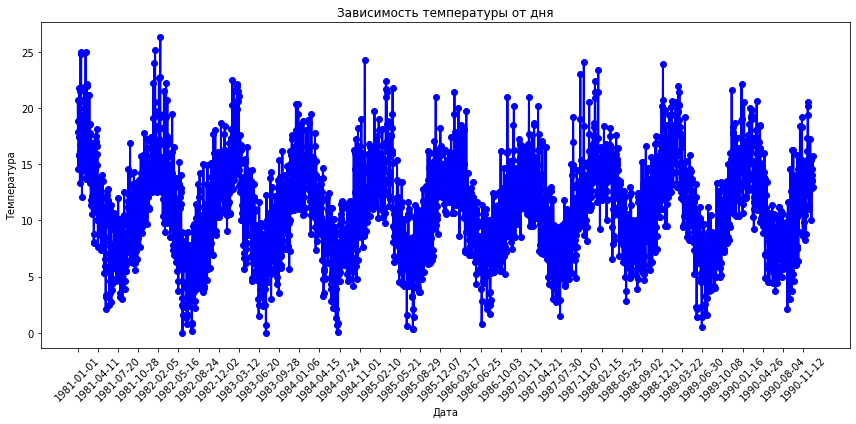

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temp'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Зависимость температуры от дня')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(df['Date'][::100], rotation=45)  # Отображаем каждую сотую дату для улучшения читаемости
plt.tight_layout()
plt.show()

### Выделите сезонные паттерны в данных. Определите, когда в году обычно бывает холодно, а когда тепло. Можно использовать средние значения температур по месяцам.

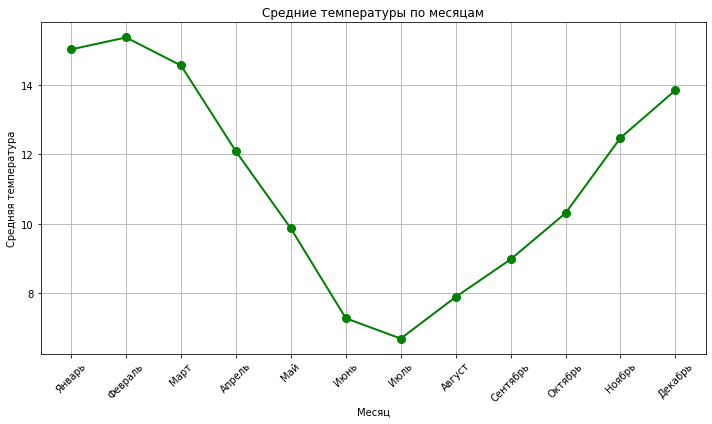

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

average_temperatures = df.groupby('Month')['Temp'].mean()

# Месяцы в году
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# Построение визуализации средних температур по месяцам
plt.figure(figsize=(10, 6))
plt.plot(months, average_temperatures, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Средние температуры по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()